<a href="https://colab.research.google.com/github/brownr16/electromagnetics_modelling/blob/main/MagneticCircuit_HysteresisNarrow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b> Hysteresis Loop of a Magnetic Circuit: Close to Saturation Only</h1></b>

Dr. Bingsen Wang

4/27/2023
</center>

#Energy Input



For a magnetic circuit with winding of $N$ turns, the induced voltage is $v=v(t)$ while the current through the winding is $i=i(t)$.
The electric power input is
$$ p(t) = v(t)i(t)\tag{1}$$

The induced voltage $v$ is related to the flux linkage $\lambda$ by
$$ v(t) = {d\lambda(t) \over dt} \tag{2}$$

Substituting (2) in (1) yields
$$ p(t) = i(t){d\lambda(t) \over dt}\tag{3}$$

The instantaneous energy input to the circuit is
$$w(t) = \int p(t)dt = \int i(\lambda) d\lambda \tag{4}$$

If the flux linkage changes from $\lambda_1$ to $\lambda_2$ within time $t_1$ to $t_2$, the total energy input is
$$\Delta W = \int_{t_1}^{t_2} p(t)dt = \int_{\lambda_1}^{\lambda_2} i(\lambda) d\lambda\tag{5}$$

If no mechanical energy was converted and there is no eddy current loss involved, the input energy that can be positive or negative will increase or decrease the energy stored in the magnetic field, respectively. 







#Relationships Amongst the Variables of a Magnetic Circuit

There are several physical variables associated with a magentic circuit. The flux linkage $\lambda$, flux $\phi$ and flux densit $B$ are related to each other by
$$\lambda = N\phi = NA_cB \tag{6}$$
where $N$ is the number of turns of the coil; $A_c$ is the cross-sectional area of the magnetic core.

On the other hand, the current $i$, magnetomotive force (mmf) $\cal{F}$, and magnetic field intensity $H$ are related to each other by
$$ i = \frac{\cal F}{N} = {l_c\over N}H \tag{7}$$

Furthermore, the following equation describes the relationship between (6) and (7)
$$\begin{align}   \lambda &= L i\\   \phi &= {\cal P}{\cal F}\\   B &= \mu H
\end{align}\tag{8}$$
where $L$ is inductance; the permeance ${\cal P} = {1\over \cal R}$ with $\cal R$ being the reluctance; $\mu$ is the permeability of the magnetic material of the core.

The following can also be derived
$$ L = N^2{\cal P} = {N^2 A_c\over l_c}\mu \tag{9}$$

Due to (9), the saturation property of the magnetic material results in the curves of $\lambda(i),\phi({\cal F}),B(H)$ being in the similar shape.  

#Mathematical Description of Magnetic Hysteresis Loop

The resource for this section is based on the reference paper "A phenomenological mathematical model of hysteresis" by J Takacs. 

##Saturation Curve
The saturation curve is described by
$$ f_s(x) = A_0 x + B_0 \tanh(C_0x) \tag{10}$$

## Hysteresis Loop

The hysteresis loop is described by two curves, one for ascending and one for descending
$$\begin{align} f_{h+} &= \tanh(x-a_0) + b_1\\
                f_{h-} &= \tanh(x+a_0) - b_1
\end{align} \tag{11}$$
where 
$$b_1 =\frac{\tanh(x_m + a_0) - \tanh(x_m - a_0)}{2} \tag{12}$$
with $x_m$ being the maximum $x$ value where $f_{h+}$ and $f_{h-}$ intersect.

#Python Code
The Python code animates hysteresis loop of magnetic material.

<ipython-input-2-54fc437a92b9>:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


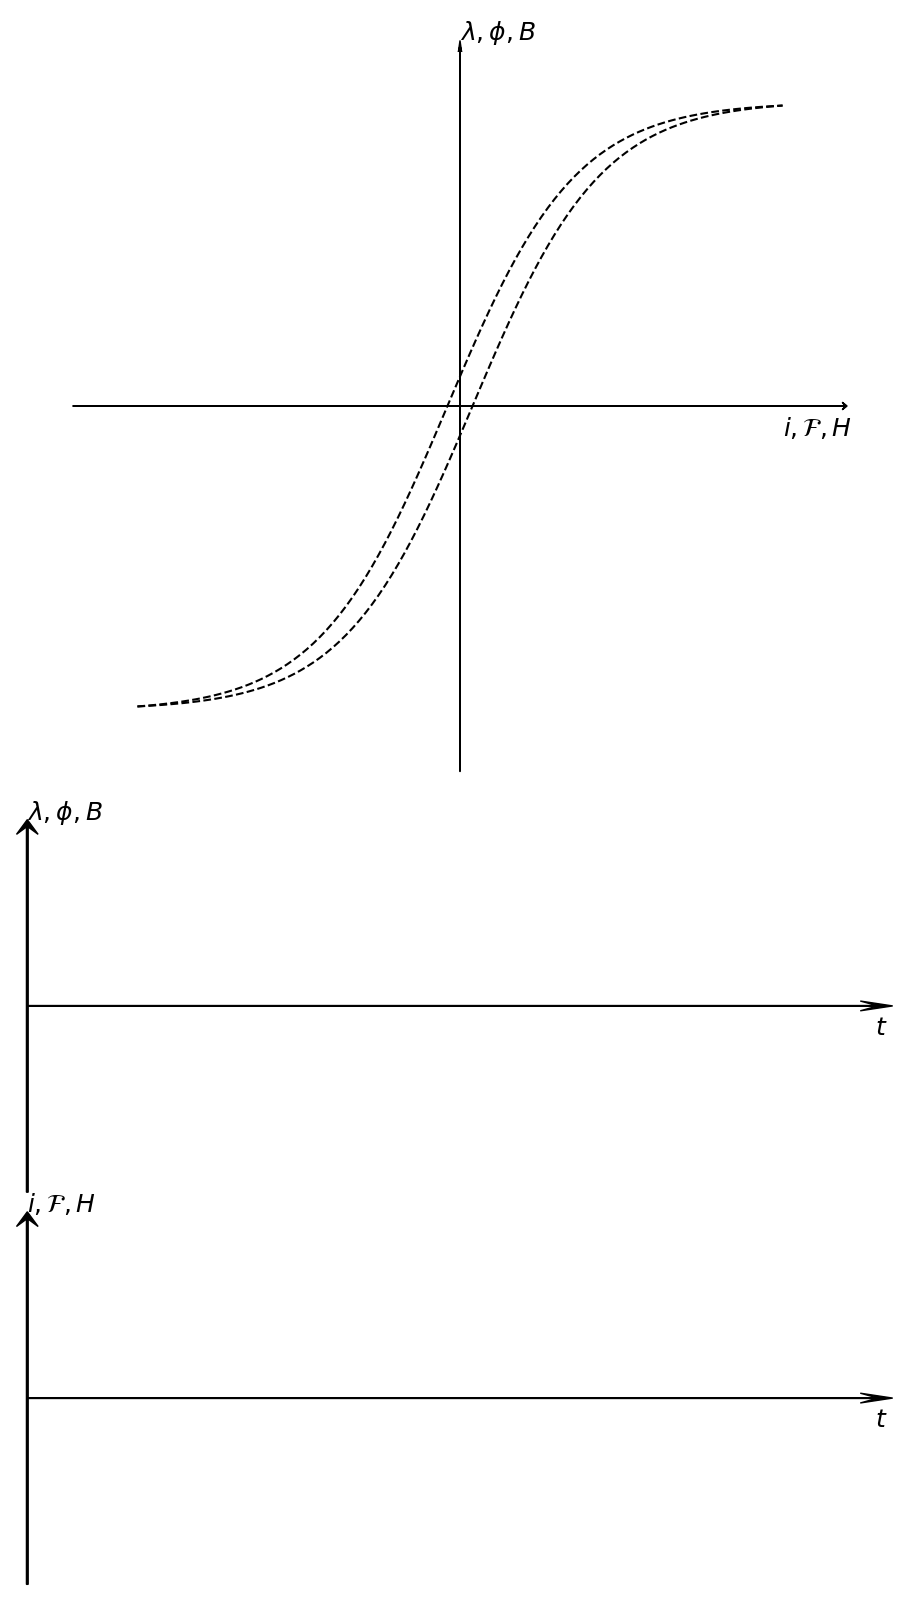

In [ ]:
from os import linesep
import numpy as np
from numpy import linspace,cos,sin,pi,exp,heaviside,angle,sqrt,tanh,arctanh
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
from matplotlib.text import TextPath
from matplotlib.path import Path
from matplotlib.patches import PathPatch,Arrow,Circle,Rectangle
from matplotlib.collections import PatchCollection
from matplotlib import animation,rc,transforms
rc('animation', html='jshtml')

#hysteresis loop with i,F,H as independent variable
def fh(x,a0,xm): 
  b1 = 0.5*(tanh(xm+a0) - tanh(xm-a0))
  fhp = tanh(x - a0) + b1
  fhn = tanh(x + a0) - b1
  return fhp,fhn,

#hysteresis loop with lambda,phi,B as independent variable
def fh_inv(y,a0,xm):
  b1 = 0.5*(tanh(xm+a0) - tanh(xm-a0))
  xhp = arctanh(y - b1) + a0
  xhn = arctanh(y + b1) - a0
  return xhp,xhn,

def drawHys(ax,a0,xm):
  x=linspace(-xm,xm,100)
  hp,hn = fh(x,a0,xm)
  ax.plot(x,hp,'--',color='k',lw=1.5)
  ax.plot(x,hn,'--',color='k',lw=1.5)
  return

fig = plt.figure(figsize=(9,16))
xylim =[3,1.2]
ax1 = fig.add_axes((1/18,0.5 , 8/9, 0.495),xlim=[-(xylim[0]+0.1),(xylim[0]+0.1)],ylim=[-(xylim[1]+0.1),(xylim[1]+0.1)]) # hystersis
xylim2=[1,2]
ax2 = fig.add_axes((0,0.0 , 1, 0.5),xlim=[-0.02,0.02+xylim2[0]], ylim=[-0.02,0.02+xylim2[1]]) # drawing area for diagram
fig.tight_layout()
ax1.axis('off')
ax2.axis('off')

kwargs = {'overhang':0.5,'width':0.002, 'head_width':0.025, 'ec':'k', 'fc':'k', 'length_includes_head':True}
ax1.arrow(-xylim[0],0,2*xylim[0],0,**kwargs)
ax1.arrow(0,-xylim[1],0,2*xylim[1],**kwargs)
ax1.text(xylim[0]-0.5,-0.1,r'$i,{\cal F},H$',size=18)
ax1.text(0,xylim[1],r'$\lambda,\phi,B$',size=18)

x0 = 0 # orgins of x-axis
y0 = [1.5,0.5] # origins of y-axis
xln = xylim2[0] # length of x-axis
yln = xylim2[1]/2*0.95 # length of y-axis
ax2.arrow(x0,y0[0],xln,0,**kwargs)
ax2.arrow(x0,y0[1],xln,0,**kwargs)
ax2.arrow(x0,y0[0]-yln*0.5,0,yln,**kwargs)
ax2.arrow(x0,y0[1]-yln*0.5,0,yln,**kwargs)
ax2.text(x0,y0[0]+yln*0.5,r'$\lambda,\phi,B$',size=18)
ax2.text(x0,y0[1]+yln*0.5,r'$i,{\cal F},H$',size=18)
ax2.text(x0+xln-0.02,y0[0]-0.075,r'$t$',size=18)
ax2.text(x0+xln-0.02,y0[1]-0.075,r'$t$',size=18)
#prameters
a0=0.1
xm=2.5
ym=fh(xm,a0,xm)[0]

Nfpp=150
Nf = 2*Nfpp
t=linspace(0,1,Nf)
lmd = ym*cos(2*pi*t)
lmd1 = lmd[0:int(Nf/2)]
lmd2 = lmd[int(Nf/2):Nf]
i1 = fh_inv(lmd1,a0,xm)[1]
i2 = fh_inv(lmd2,a0,xm)[0]

drawHys(ax1,a0,xm) #draw hysteresis loop

lines = [] #array containing all the line segments
lines.append(ax1.plot([], [], color='b', lw=4)[0])
lines.append(ax1.plot([], [], color='r', lw=4)[0])
lines.append(ax1.plot([], [], color='b', lw=1,marker='o',ls='--')[0])
lines.append(ax1.plot([], [], color='b', lw=1,marker='o',ls='--')[0])
lines.append(ax1.plot([], [], color='r', lw=1,marker='o',ls='--')[0])
lines.append(ax1.plot([], [], color='r', lw=1,marker='o',ls='--')[0])
for k in range(2):
  lines.append(ax2.plot([], [], color='b', lw=3)[0]) 
  lines.append(ax2.plot([], [], color='r', lw=3)[0]) 
  
def init(): #initialize the lines
  for k in range(10):
    lines[k].set_data([],[])
  return lines
# animation function.  This is called sequentially
def animate(i):
  if i<Nfpp:
    lines[0].set_data(i1[0:i+1],lmd1[0:i+1])
    lines[2].set_data([i1[i],i1[i]],[0,lmd1[i]])
    lines[3].set_data([0,i1[i]],[lmd1[i],lmd1[i]])
    lines[6].set_data(t[0:i+1]+x0,y0[0]+lmd1[0:i+1]*yln*0.475)
    lines[8].set_data(t[0:i+1]+x0,y0[1]+i1[0:i+1]/xm*yln*0.475)
  else:
    i=i%Nfpp
    for k in range(2):
      lines[2+k].set_data([],[])
    lines[1].set_data(i2[0:i+1],lmd2[0:i+1])
    lines[4].set_data([i2[i],i2[i]],[0,lmd2[i]])
    lines[5].set_data([0,i2[i]],[lmd2[i],lmd2[i]])
    lines[7].set_data(t[Nfpp:Nfpp+i+1]+x0,y0[0]+lmd2[0:i+1]*yln*0.475)
    lines[9].set_data(t[Nfpp:Nfpp+i+1]+x0,y0[1]+i2[0:i+1]/xm*yln*0.475)
  return lines

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=Nf, interval=50)
# anim #uncomment to generate animation in the output area
# to save the animation, uncomment the following three lines
fn = r"MagneticCircuit_HysteresisLoopNarrow.mp4" 
writervideo = animation.FFMpegWriter(fps=50) 
anim.save(fn, writer=writervideo,dpi = 200)

# debug
# drawHys(ax1,1,2.5)
# ax2.plot(t,y0[0]+lmd*yln*0.475)
# ax2.plot(t,y0[1]+i_lmd/xm*yln*0.475)
# ax1.plot(i1[0:10],lmd1[0:10],'b',lw=3)
# lines[2].set_data(i2,lmd2)